<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/DataAPI_tf_carga_preproceso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga y preprocesamiento de datos con TensorFlow**



In [109]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Lectura y preproceso de bases de datos en deep learning

* Hasta el momento se han utilizado bases de datos que pueden ser cargadas completamente en memoría RAM.

* Sin embargo, los modelos de Deep Learning generalmente incluyen bases de datos muy grandes que no pueden ser cargadas completamente en RAM.

* Por ende la Data API de tensorflow busca facilitar los procesos de carga y preproceso de bases de datos.

* Un objeto dataset de tf permite indicarle en donde obtener los datos y como transformarlos.

* Tensorflow se encarga del multithreading (múltiples hilos de ejecución), queuing (procesos en cola), batching (generar lotes), y  prefetching (precarga).

* **Tipos de archivos permitidos para lectura con Data API**: 
  - Archivos de texto  (csv)
  - Archivos binarios
  - Grabaciones de tamaño fijo (records)
  - Archivos binarios usados por tf (TFRecord que acepta variaciones en tamaño)
  - Archivos de bases de datos [SQL](https://www.tensorflow.org/io/tutorials/postgresql)

* Existen también varias extensiones para leer datos desde diferentes fuentes, como [BigQuery](https://cloud.google.com/bigquery/?utm_source=google&utm_medium=cpc&utm_campaign=latam-CO-all-es-dr-BKWS-all-all-trial-b-dr-1009133-LUAC0009156&utm_content=text-ad-none-any-DEV_c-CRE_431361001365-ADGP_BKWS%20%7C%20Multi%20~%20Big%20Data%20%7C%20Big%20Query-KWID_43700042633032772-kwd-604243994624&utm_term=KW_%2Bgoogle%20%2Bbig%20%2Bquery-ST_%2BGoogle%20%2BBig%20%2BQuery&gclid=Cj0KCQiAwf39BRCCARIsALXWETx7awRwi0H0JkU-PmjAMzfahmdlFg4AMStEu-mLRazMEdKLzN0BkGMaAprUEALw_wcB&gclsrc=aw.ds) de Google.

**NOTA**:Además de los procesos de lectura eficiente, generalmente, se requiere aplicar preprocesos (normalización, encoding, embedding).

-- **Principales objetos:**

  - tf Transform: permite generar preprocesamientos que pueden ser ejecutados en modo batch sobre la base de datos completa antes de entrenar, y después convertirla en una función tf para ser desplagada en ambientes de producción.

  - tf Datasets (TFDS): permite descargar bases de datos convencionales para deep learning, por ejemplo ImageNet, y construir objetos tf para manipularlas con Data API.

## Data API

* Idea central: representar secuencia de datos que se cargan gradualmente desde disco duro!




In [3]:
#ejemplo
X = tf.range(10) #crear tensor
#tf.data.Dataset.rang(10)
#crea dataset tf como particiones a lo largo de la primera dimensión de X
dataset = tf.data.Dataset.from_tensor_slices(X) 
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

Alternativa:

In [4]:
dataset = tf.data.Dataset.range(10)

In [5]:
for item in dataset: # iterar  por items
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


Una vez generado el objeto dataset, se pueden aplicar métodos de transformación.

In [6]:
#Se repite tres veces pero sin copiar en memoría!
#Se generan batchs de 7 items
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [7]:
#función anónima para transformación de datos
#util para preprocesamiento
#map se aplica por item en el dataset
dataset = dataset.map(lambda x: x * 2)

In [8]:
#recorrer items
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [9]:
#dataset = dataset.apply(tf.data.experimental.unbatch())
#apply se aplica a toda la base de datos
dataset = dataset.unbatch()



In [10]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

In [11]:
#filtrar base de datos
dataset = dataset.filter(lambda x: x < 10)  # solo se seleccionan items < 10

In [12]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [13]:
for item in dataset.take(3): #take escoge unos cuantos items 
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [14]:
tf.random.set_seed(42)

#se busca muestras iid, buffer se sugiere grande (sin exceder la RAM!) para asegurar un buen shuffle
dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7) 
for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


## Partir la base de datos en varios archivos CSV

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#se carga y preprocesa la base de datos
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

**Para bases de datos grandes, generalmente se parte en varios archivos y luego tf lee dichos archivos en paralelo.**

In [16]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f: #escribir archivo como texto
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]])) # repr: version imprimible en texto (str)
                f.write("\n")
    return filepaths

In [17]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

Se particionaron los datos en varios archivos CSV

In [18]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


Si se carga en modo texto:

In [19]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [20]:
train_filepaths # path de archivos csv xtrain

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

## Pipeline para lectura desde archivos CSV

In [21]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42) # tf dataset con los paths
#por defecto list_file baraja (shuffle) las listas, si se desea preservar el orden shuffle=False

In [22]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_04.csv', shape=(), dtype=string)
tf.Ten

In [23]:
n_readers = 5 #interleave permite leer varios archivos al tiempo e intercala las lineas 
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), #skip se salta la primera fila (encabezado-header)
    cycle_length=n_readers,num_parallel_calls=2) #lee  en paralelo según los hilos impuestos



In [24]:
for line in dataset.take(5): #se leen como byte strings
    print(line.numpy())

b'4.6477,38.0,5.03728813559322,0.911864406779661,745.0,2.5254237288135593,32.64,-117.07,1.504'
b'8.72,44.0,6.163179916317992,1.0460251046025104,668.0,2.794979079497908,34.2,-118.18,4.159'
b'3.8456,35.0,5.461346633416459,0.9576059850374065,1154.0,2.8778054862842892,37.96,-122.05,1.598'
b'3.3456,37.0,4.514084507042254,0.9084507042253521,458.0,3.2253521126760565,36.67,-121.7,2.526'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'


In [25]:
#se requiere convertir las strings a número
record_defaults=[0, np.nan, tf.constant(np.nan, dtype=tf.float64), "Hello", tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults) #convierte datos según formato en record_defaults
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

Si se tienen campos en vacio se reemplazan por su valor por defecto según record_defaults:

In [26]:
parsed_fields = tf.io.decode_csv(',,,,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

El quinto campo es obligatorio dado que se impuso una `tf.constant([])` como valor por defecto:

In [27]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Field 4 is required but missing in record 0! [Op:DecodeCSV]


El número de campos en el registro debe ser igual al número de campos en `record_defaults`:

In [28]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [29]:
# Si se crea una función que realice dicho preproceso
n_inputs = 8 # X_train.shape[-1]

@tf.function #decorador (convierte código a tf)
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y # se asume X_mean y X_std precalculados

In [30]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [31]:
FILEID = "1p8oQTsYq0wcPeb8YGANTe__DCy7-PM46"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O cargacsv.jpg && rm -rf /tmp/cookies.txt
FILEID = "1pCwcWGAew-AH5YnGuQaS8rLUZwEh3KQC"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O prefetch.jpg && rm -rf /tmp/cookies.txt


--2020-12-04 20:15:34--  https://docs.google.com/uc?export=download&confirm=&id=1p8oQTsYq0wcPeb8YGANTe__DCy7-PM46
Resolving docs.google.com (docs.google.com)... 172.253.117.138, 172.253.117.139, 172.253.117.101, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-88-docs.googleusercontent.com/docs/securesc/l40r5n153se33fdvm8ih6dafajkqbbd4/j6juuspef6t3gi2qh9l41ro5l0bnjsfq/1607112900000/09173029842254050324/11354115234010830535Z/1p8oQTsYq0wcPeb8YGANTe__DCy7-PM46?e=download [following]
--2020-12-04 20:15:34--  https://doc-14-88-docs.googleusercontent.com/docs/securesc/l40r5n153se33fdvm8ih6dafajkqbbd4/j6juuspef6t3gi2qh9l41ro5l0bnjsfq/1607112900000/09173029842254050324/11354115234010830535Z/1p8oQTsYq0wcPeb8YGANTe__DCy7-PM46?e=download
Resolving doc-14-88-docs.googleusercontent.com (doc-14-88-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting 

# Esquema completo de carga y preproceso desde varios CSV

In [32]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=2, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads) #intercala lectura en multiples hilos
    dataset = dataset.shuffle(shuffle_buffer_size) #baraja el dataset
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads) # preproceso definido
    dataset = dataset.batch(batch_size) #crea lotes
    return dataset.prefetch(1) #precarga un lote

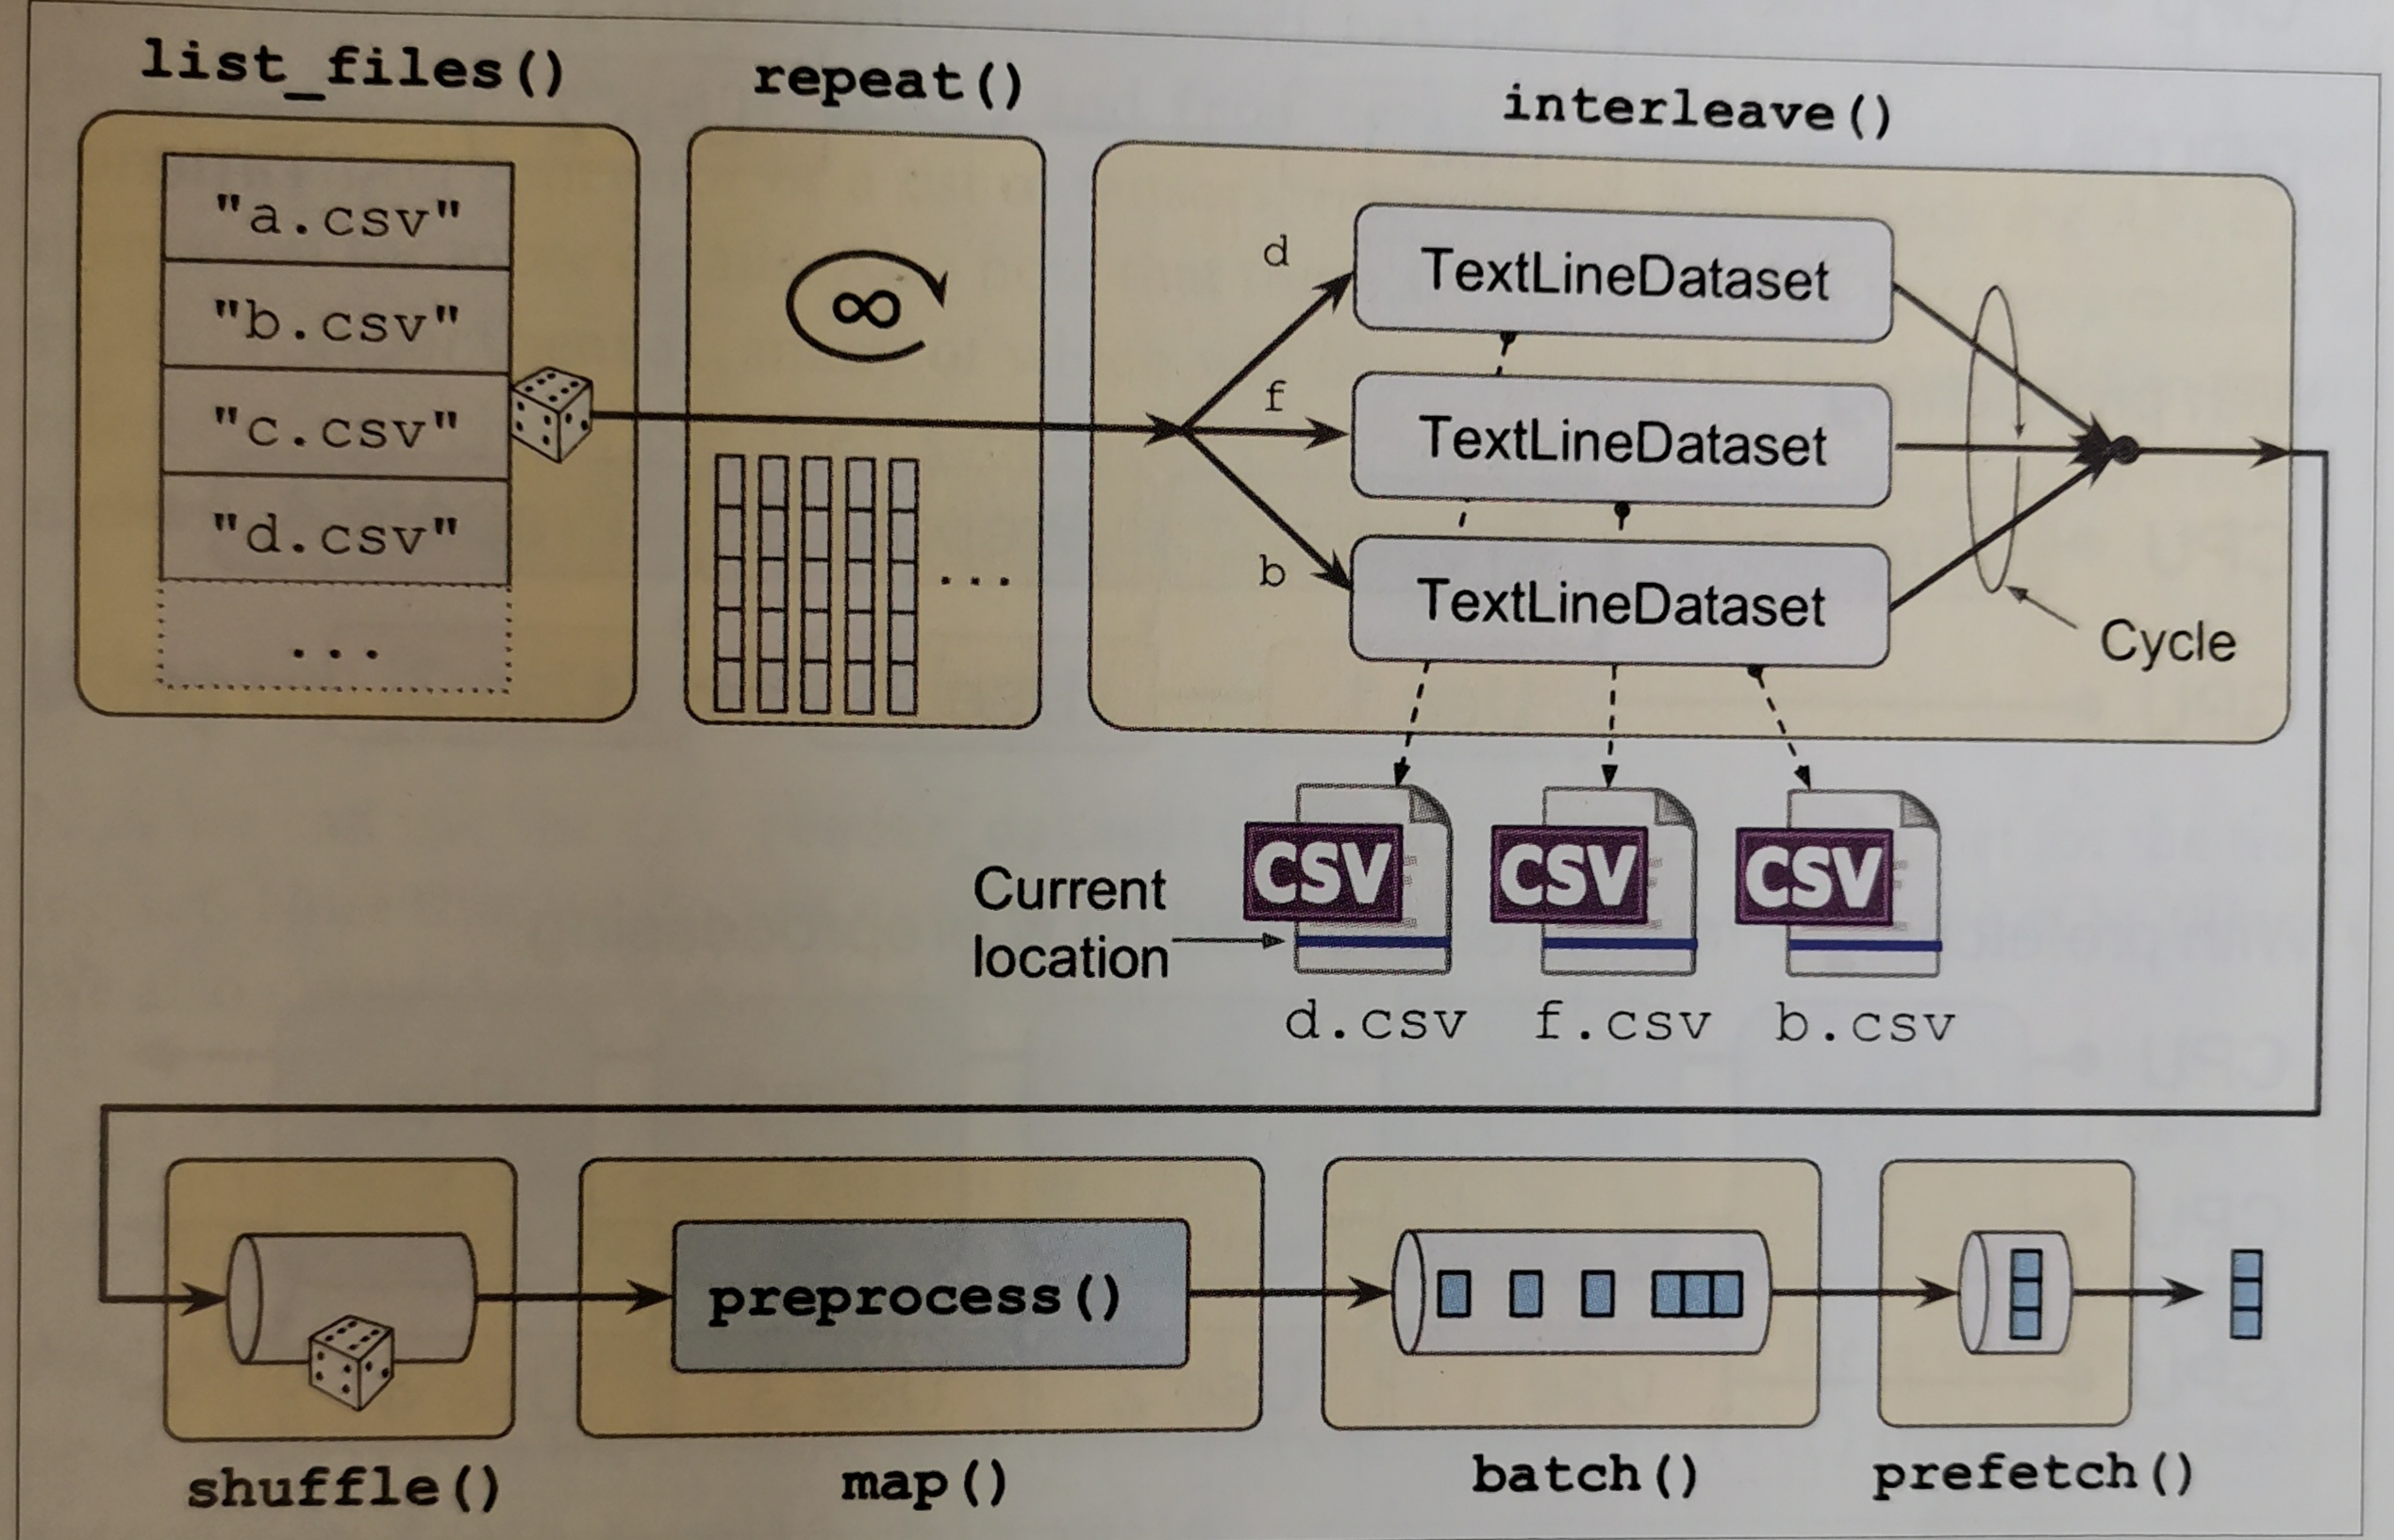

In [33]:
from IPython.display import Image
Image(filename = "cargacsv.jpg", width=600)

## Prefetching (precarga)

* Según el código anterior precargamos un lote para tratar de estar siempre con un batch precargado y listo.

* Mientras el algoritmo se va entrenando, en paralelo estamos cargando el siguiente batch para que este listo (precargándolo y preprocesándolo).

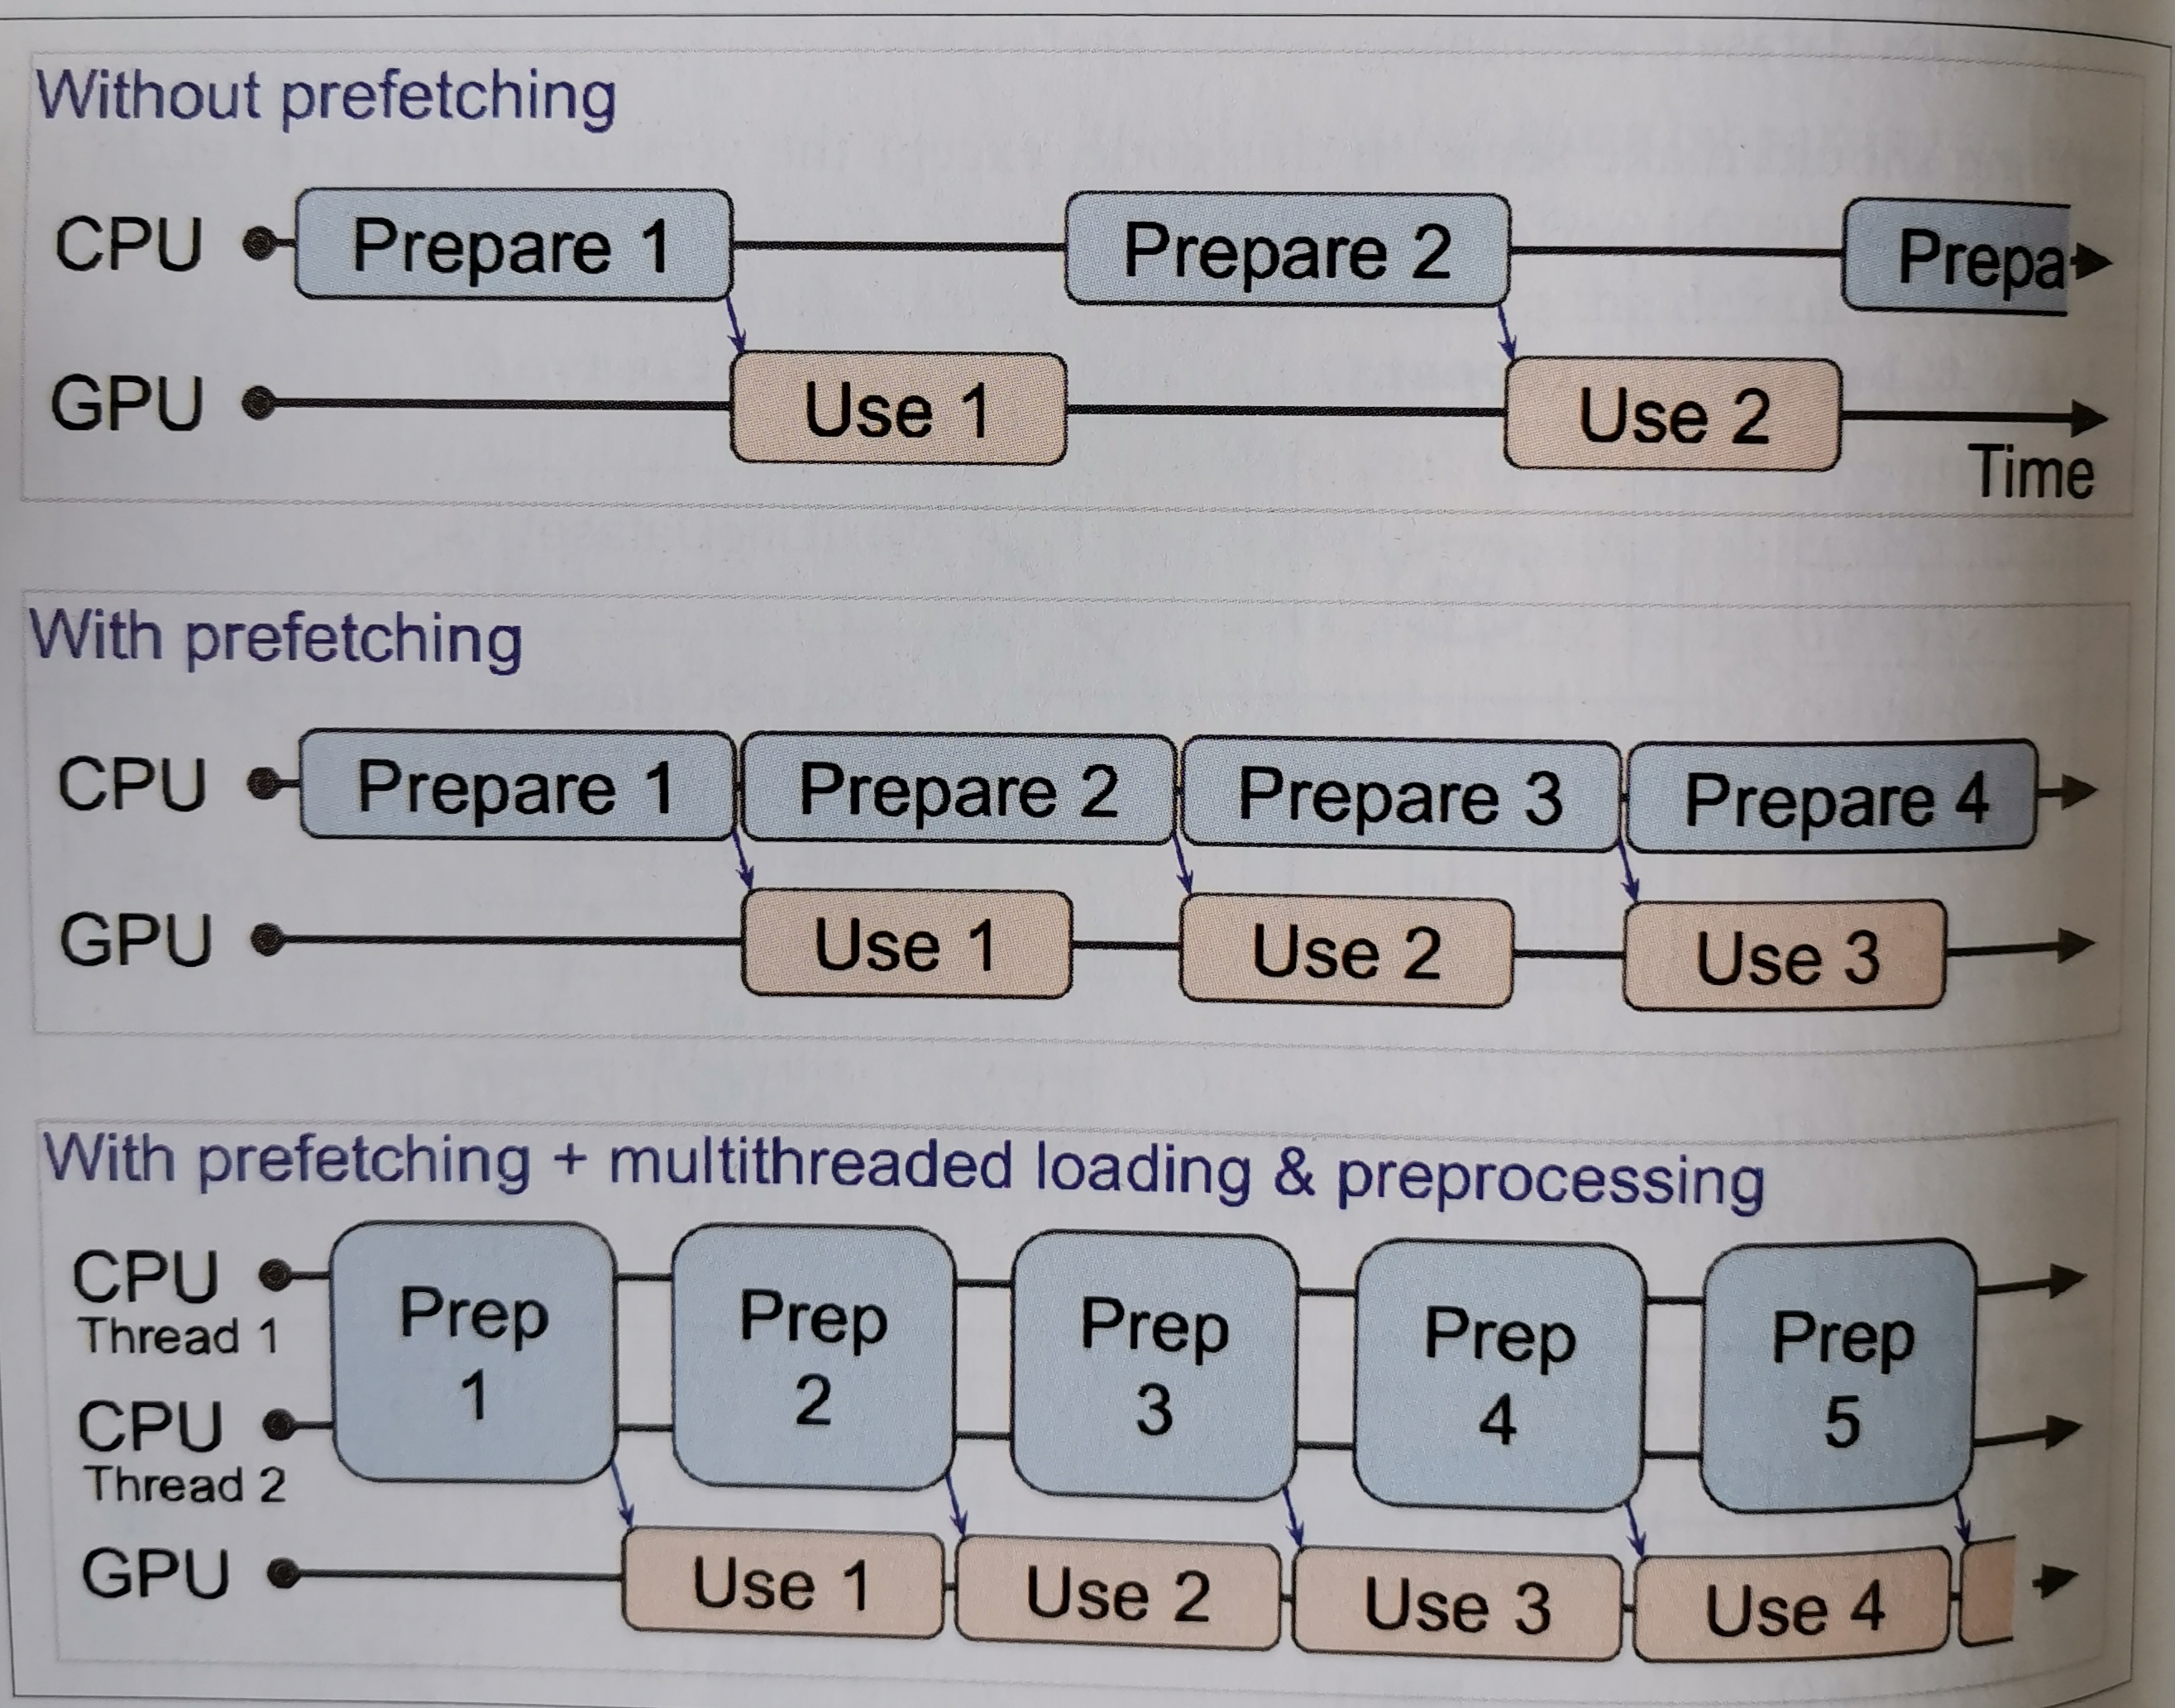

In [34]:
Image(filename = "prefetch.jpg", width=600)

In [35]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



In [36]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

print(train_set)
print(valid_set)
print(test_set)

<PrefetchDataset shapes: ((None, 8), (None, 1)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 8), (None, 1)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 8), (None, 1)), types: (tf.float32, tf.float32)>


# Entrenar modelo DL sobre tf.dataset

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [39]:
history = model.fit(train_set,epochs=10, validation_data=valid_set) 
#fit llama el método repeat para reinicializar la lectura de lotes 
#si se fija repeat en None se debe definir el steps_per_epoch=len(X_train) // batch_size

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.6391 - val_loss: 0.9463
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7066 - val_loss: 0.6542
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6346 - val_loss: 0.6065
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5705
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5701 - val_loss: 0.5420
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5477 - val_loss: 0.5275
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5294 - val_loss: 0.4944
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.4850
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4997 - val_loss: 0.4670
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4879 - val_loss: 0.4587

In [40]:
model.evaluate(test_set)

162/162 [==============================] - 0s 2ms/step - loss: 0.4768


0.4767600893974304

In [41]:
new_set = test_set.take(3).map(lambda X, y: X) # podemos pasar tres datos y evitar las salidas
y = model.predict(new_set)
print(y.shape)

(96, 1)


In [42]:
len(list(new_set)) # 3 batches de 32 elementos

3

# Entrenamiento por custom loop usando tf.Datasets

In [43]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

n_epochs = 5
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
total_steps = n_epochs * n_steps_per_epoch
global_step = 0
for X_batch, y_batch in train_set.take(total_steps): #definir  cuantos lotes por epoca
    global_step += 1
    print("\rGlobal step {}/{}".format(global_step, total_steps), end="")
    with tf.GradientTape() as tape:
        y_pred = model(X_batch)
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
        loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables) #se aplica autodiff sobre parámetros del modelo
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Global step 363/1810

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
#modelo custom completo
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rGlobal step", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


Descripciones básicas de los métodos de la clase Dataset:

In [48]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m) #obtener atributos
        if hasattr(func, "__doc__"): # si contiene el  atributo
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`.
● from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
● from_tensors()       Creates a `Dataset` 

## El formato binario `TFRecord` 

* Si se puede trabajar con CSV o el formato de su preferencia, se sugiere utilizarlo.

* TFRecord es útil para mitigar cuellos de botella durante el entrenamiento por cargas y preproceso de datos, utilizado para manipular grandes cantidades de datos.


Un TFRecord es una lista de registros binarios y se puede crear con `tf.io.TFRecordWriter`:

In [49]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

Se puede utilizar el método `tf.data.TFRecordDataset` para lectura:

In [50]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


Se pueden leer múltiples TFRecord con `TFRecordDataset`. Por defecto, se lee un archivo a la vez, pero si se fija `num_parallel_reads=3`, leerá 3 al tiempo e intercalará  los records:

In [51]:
filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("File {} record {}".format(i, j).encode("utf-8")) # escribir archivos

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3) #lectura en paralelo
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


* TFRecord permite comprimir los archivos, útil para carga mediante conexión a la red.

In [52]:
options = tf.io.TFRecordOptions(compression_type="GZIP") #compresión del tfrecord
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [53]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP") #lectura
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### Protocol buffers

* Aunque el tfrecord usa el formato binario, usualmente contienen protocolos de serialización  por buffers ([protobufs](https://developers.google.com/protocol-buffers)).

* Dicho protocolo (portable y extendible) fue desarrollado por Google en el 2001 y fue declarado opensource en 2008.

* Protobufs son ampliamente utilizados, por ejemplo en Google remote procedure call system - [gRPC](https://grpc.io/docs/what-is-grpc/introduction/)



Definición simple de protobuf:

In [54]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


Después de creado el archivo .proto se deve compilar ( `--descriptor_set_out` y `--include_imports` se requieren para la clase `tf.io.decode_proto()`):

In [55]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [56]:
!ls person*

person.desc  person_pb2.py  person.proto


In [57]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com","b@c.com"])  # crea el mensaje
print(person)  

name: "Al"
id: 123
email: "a@b.com"
email: "b@c.com"



In [58]:
person.name  # lectura de un campo

'Al'

In [59]:
person.name = "Alice"  # modificar un campo

In [60]:
person.email[1]  # los campos que se repiten se pueden acceder como listas

'b@c.com'

In [61]:
person.email.append("c@d.com")  # apilar nuevo email

In [62]:
s = person.SerializeToString()  # serializar a cadena de bytes para transmitir los datos
s


b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07b@c.com\x1a\x07c@d.com'

In [63]:
person2 = Person()  # create a new Person
person2.ParseFromString(s)  # para recibir y leer los datos binarios

36

In [64]:
len(s)

36

In [65]:
person == person2  #

True

In [66]:
person2

name: "Alice"
id: 123
email: "a@b.com"
email: "b@c.com"
email: "c@d.com"

In [67]:
person

name: "Alice"
id: 123
email: "a@b.com"
email: "b@c.com"
email: "c@d.com"

#### Custom protobuf

En algunos casos se requiere analizar a protobuf propio en TensorFlow. Para ello se puede usar `tf.io.decode_proto()`:

In [68]:
person_tf = tf.io.decode_proto(
    bytes=s,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="person.desc")

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a@b.com', b'b@c.com', b'c@d.com'], dtype=object)>]

### TensorFlow Protobufs

* El tf.train.Example protobuf representa una instancia del dataset.

* Contiene la lista de los nombres de los atributos, en donde cada característica puede ser una lista de cadenas de bytes, lista de flotantes, o lista de enteros.



```proto
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; } # packed se usa para campos numéricos repetidos
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };
```

In [69]:
#from tensorflow.train import BytesList, FloatList, Int64List
#from tensorflow.train import Feature, Features, Example
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString()) #se genera record file

In [70]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

- Para casos prácticos se requiere leer de un csv o el formato de preferencia, crear un Example protobuf por cada muestra, serializar, y guardar varios archivos TFRecords, idealmente barajándolos en el proceso para posterior entrenamiento.

- **Por eso revise si es realmente necesario pasar a  TFRecord**.

In [71]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f5e05c064e0>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [72]:
parsed_example["emails"].values[0] #acceder a los campos

<tf.Tensor: shape=(), dtype=string, numpy=b'a@b.com'>

In [73]:
#los campos de longitud variable se analizan como tensores ralos (sparse)
tf.sparse.to_dense(parsed_example["emails"], default_value=b"") 

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [74]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

### TFRecords para imágenes

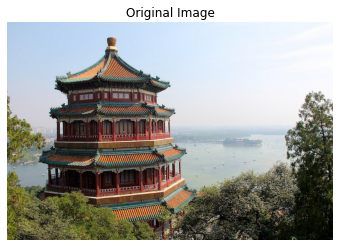

In [75]:
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [76]:
data = tf.io.encode_jpeg(img) #codificar imagen
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))#crear objeto example tfrecord
serialized_example = example_with_image.SerializeToString() #serializar y guardar como TFRecord

In [77]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

Se puede usar `decode_image()` que soporta formatos BMP, GIF, JPEG y PNG:

In [78]:
decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

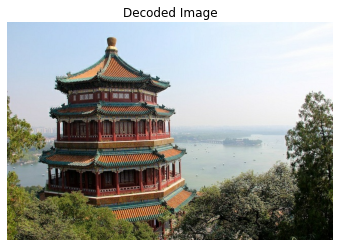

In [79]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

# Algunos ejemplos útiles para manipular imágenes com TFRecords:

* [Ejemplo tf](https://www.tensorflow.org/tutorials/load_data/tfrecord#walkthrough_reading_and_writing_image_data)

* [Ejemplo 2](https://medium.com/ai%C2%B3-theory-practice-business/image-dataset-with-tfrecord-files-7188b565bfc)

* [Ejemplo completo keras](https://keras.io/examples/keras_recipes/tfrecord/)



# The Features API

Let's use the variant of the California housing dataset that we used in Chapter 2, since it contains categorical features and missing values:

In [80]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [81]:
fetch_housing_data()

In [82]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [83]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
housing_median_age = tf.feature_column.numeric_column("housing_median_age")

In [85]:
age_mean, age_std = X_mean[1], X_std[1]  # The median age is column in 1
housing_median_age = tf.feature_column.numeric_column(
    "housing_median_age", normalizer_fn=lambda x: (x - age_mean) / age_std)

In [86]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income = tf.feature_column.bucketized_column(
    median_income, boundaries=[1.5, 3., 4.5, 6.])

In [87]:
bucketized_income

BucketizedColumn(source_column=NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1.5, 3.0, 4.5, 6.0))

In [88]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab)

In [89]:
ocean_proximity

VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [90]:
# Just an example, it's not used later on
city_hash = tf.feature_column.categorical_column_with_hash_bucket(
    "city", hash_bucket_size=1000)
city_hash

HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

In [91]:
bucketized_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=[-1., -0.5, 0., 0.5, 1.]) # age was scaled
age_and_ocean_proximity = tf.feature_column.crossed_column(
    [bucketized_age, ocean_proximity], hash_bucket_size=100)

In [92]:
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")
bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=list(np.linspace(-125., -114., 20 - 1)))
location = tf.feature_column.crossed_column(
    [bucketized_latitude, bucketized_longitude], hash_bucket_size=1000)

In [93]:
ocean_proximity_one_hot = tf.feature_column.indicator_column(ocean_proximity)

In [94]:
ocean_proximity_embed = tf.feature_column.embedding_column(ocean_proximity,
                                                           dimension=2)

### Using Feature Columns for Parsing

In [95]:
median_house_value = tf.feature_column.numeric_column("median_house_value")

In [96]:
columns = [housing_median_age, median_house_value]
feature_descriptions = tf.feature_column.make_parse_example_spec(columns)
feature_descriptions

{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [97]:
with tf.io.TFRecordWriter("my_data_with_features.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=[x])),
            "median_house_value": Feature(float_list=FloatList(value=[y]))
        }))
        f.write(example.SerializeToString())

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, feature_descriptions)
    targets = examples.pop("median_house_value") # separate the targets
    return examples, targets

batch_size = 32
dataset = tf.data.TFRecordDataset(["my_data_with_features.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

In [100]:
columns_without_target = columns[:-1]
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
362/362 [==============================] - 1s 2ms/step - loss: 3.7619 - accuracy: 0.0016
Epoch 2/5
362/362 [==============================] - 1s 2ms/step - loss: 1.9311 - accuracy: 0.0027
Epoch 3/5
362/362 [==============================] - 1s 2ms/step - loss: 1.4434 - accuracy: 0.0026
Epoch 4/5
362/362 [==============================] - 1s 2ms/step - loss: 1.3579 - accuracy: 0.0030
Epoch 5/5
362/362 [==============================] - 1s 2ms/step - loss: 1.3473 - accuracy: 0.0038


In [101]:
some_columns = [ocean_proximity_embed, bucketized_income]
dense_features = keras.layers.DenseFeatures(some_columns)
dense_features({
    "ocean_proximity": [["NEAR OCEAN"], ["INLAND"], ["INLAND"]],
    "median_income": [[3.], [7.2], [1.]]
})

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.14504611,  0.7563394 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.1119912 ,  0.56957847],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.1119912 ,  0.56957847]], dtype=float32)>

# TF Transform

In [102]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

TF Transform is not installed. Try running: pip3 install -U tensorflow-transform


# TensorFlow Datasets

In [103]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [104]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

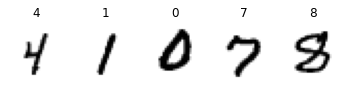

In [105]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch

In [106]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [107]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].repeat().prefetch(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 31.8033 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 25.8047 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 25.2735 - accuracy: 0.8725
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 23.9691 - accuracy: 0.8765
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 24.1231 - accuracy: 0.8759
